In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

#Reading Dataset

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/DSc/Casestudy/train_ctrUa4K.csv')



```
`[# This is formatted as code](https:// [link text](https:// [link text](https:// [link text](https:// [link text](https:// [link text](https://))))))`
```

The dataset is about whether to give loans to the people who applied loan . We are doing that based on the historical data and we will be predicting from that.For predicting something the machine needs to understand so we will be converting categorical data into numbers so that we can implement Classification Algorithms to predict whether an applicant can be given loan or not . The dataset we have chosen here is Loan Analysis data set

In [77]:
df.shape

(614, 13)

In [78]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [82]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Fill null values

In [83]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Split data into object and numerical to fill null values


In [84]:
obj_df = df.select_dtypes(include=['object']).copy() #Extracting all the categorical features and storing it in the dataframe obj_df

In [85]:
num_features = df.select_dtypes(include = ['float64', 'int64']).copy() #Extracting all the features with data type integer and storing it in the dataframe num_features
num=num_features#Storing a copy of the features in num_feature which has numerical values to the dataframe num

In [86]:
num.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [87]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [88]:
missing_values = ['na', '--', 'n/a', 'NA', '-']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
transformed_values = imputer.fit_transform(num)
num = pd.DataFrame(transformed_values,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
num.tail(13)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
601,2894.0,2792.0,155.000000,360.0,1.0
602,5703.0,0.0,128.000000,360.0,1.0
603,3676.0,4301.0,172.000000,360.0,1.0
604,12000.0,0.0,496.000000,360.0,1.0
605,2400.0,3800.0,146.412162,180.0,1.0
606,3400.0,2500.0,173.000000,360.0,1.0
607,3987.0,1411.0,157.000000,360.0,1.0
608,3232.0,1950.0,108.000000,360.0,1.0
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0


In [89]:
obj_df.dtypes

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [90]:
for column in obj_df.columns:
    obj_df[column].fillna(obj_df[column].mode()[0], inplace=True) #Fills the NaN values of categorical attributes with the mode of each attribute
obj_df.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [91]:
data = pd.concat([obj_df,num], axis=1) 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849.0,0.0,146.412162,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583.0,1508.0,128.000000,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000.0,0.0,66.000000,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583.0,2358.0,120.000000,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000.0,0.0,141.000000,360.0,1.0


In [92]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

#Data Transformation


In [93]:
data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Here we have done label encoding manually

In [94]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [95]:
data['Married'] = data['Married'].map({'Yes':1,'No':0})

In [96]:
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})

In [97]:
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0})

In [98]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [99]:
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Dependents'] = data['Dependents'].astype('int64')

In [100]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [101]:
for column in data.columns:
  print(data[column].value_counts())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
1    480
0    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1

In [102]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

This method is called binning, I did this because when I plotted the graph I observed that this can be used here

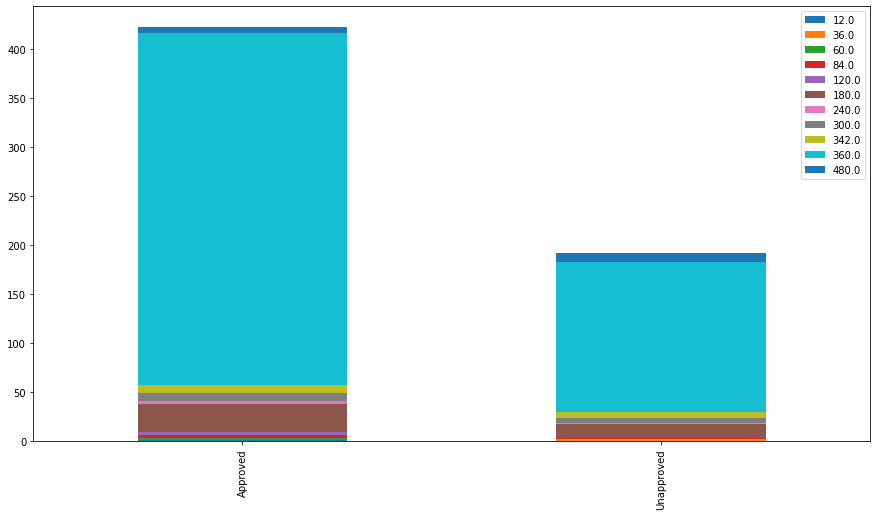

In [103]:
approved_term = data[data['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data[data['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [104]:
data['Very_Short_Term'] = data['Loan_Amount_Term'].map(lambda t: 0 if t<=60 else 0)
data['Short_Term'] = data['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
data['Long_Term'] = data['Loan_Amount_Term'].map(lambda t: 2 if t>=180 and t<=300  else 0)
data['Very_Long_Term'] = data['Loan_Amount_Term'].map(lambda t: 3 if t>300 else 0)

In [105]:
data['labelTerm'] = 0

In [106]:
data['labelTerm'] = data['Very_Short_Term'] + data['Short_Term'] + data['Long_Term'] + data['Very_Long_Term']


In [107]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,labelTerm
0,LP001002,1,0,0,1,0,Urban,Y,146.412162,360.0,1.0,5849.0,0,0,0,3,3
1,LP001003,1,1,1,1,0,Rural,N,128.000000,360.0,1.0,6091.0,0,0,0,3,3
2,LP001005,1,1,0,1,1,Urban,Y,66.000000,360.0,1.0,3000.0,0,0,0,3,3
3,LP001006,1,1,0,0,0,Urban,Y,120.000000,360.0,1.0,4941.0,0,0,0,3,3
4,LP001008,1,0,0,1,0,Urban,Y,141.000000,360.0,1.0,6000.0,0,0,0,3,3


In [108]:
data['labelTerm'].value_counts()

3    541
2     61
1      7
0      5
Name: labelTerm, dtype: int64

In [109]:
data.drop(labels=['Very_Short_Term'	,'Short_Term'	,'Long_Term',	'Very_Long_Term'],axis=1,inplace=True)

In [110]:
data['Credit_History'] = data['Credit_History'].map(lambda c: 0 if c==0 else 1)
data['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [112]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,labelTerm
0,LP001002,1,0,0,1,0,2,Y,146.412162,360.0,1,5849.0,3
1,LP001003,1,1,1,1,0,0,N,128.000000,360.0,1,6091.0,3
2,LP001005,1,1,0,1,1,2,Y,66.000000,360.0,1,3000.0,3
3,LP001006,1,1,0,0,0,2,Y,120.000000,360.0,1,4941.0,3
4,LP001008,1,0,0,1,0,2,Y,141.000000,360.0,1,6000.0,3


In [113]:
data.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Property_Area       0
Loan_Status         0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Total_Income        0
labelTerm           0
dtype: int64

In [114]:
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,labelTerm
246,LP001814,1,1,2,1,0,2,Y,112.0,360.0,1,9703.0,3
610,LP002979,1,1,3,1,0,0,Y,40.0,180.0,1,4106.0,2
562,LP002820,1,1,0,1,0,0,Y,211.0,360.0,1,7977.0,3
280,LP001910,1,0,1,0,1,2,N,158.0,360.0,0,6479.0,3
377,LP002223,1,1,0,1,0,1,Y,130.0,360.0,1,4310.0,3
240,LP001798,1,1,2,1,0,0,Y,120.0,360.0,1,10819.0,3
25,LP001066,1,1,0,1,1,1,Y,191.0,360.0,1,9560.0,3
297,LP001954,0,1,1,1,0,2,Y,135.0,360.0,1,4666.0,3
475,LP002527,1,1,2,1,1,0,Y,150.0,360.0,1,17539.0,3
568,LP002840,0,0,0,1,0,2,N,9.0,360.0,1,2378.0,3


#Visualisation


**HISTOGRAM**


To show the frequency of numerical attributes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


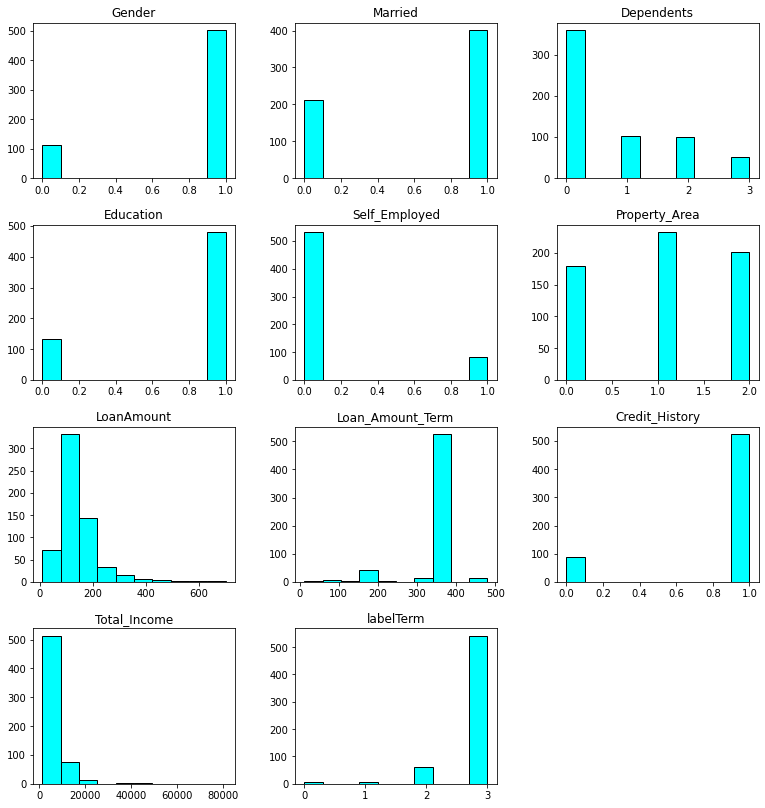

In [115]:
fig = plt.figure(figsize = (13,14))
ax = fig.gca()
data.hist(ax = ax,color="cyan",bins=10,grid=False,edgecolor="black")
plt.show()

**BAR PLOT** 


We can observe that most of the loans are approved for the semi urban followed by urban and most of them are disapproved for rural areas

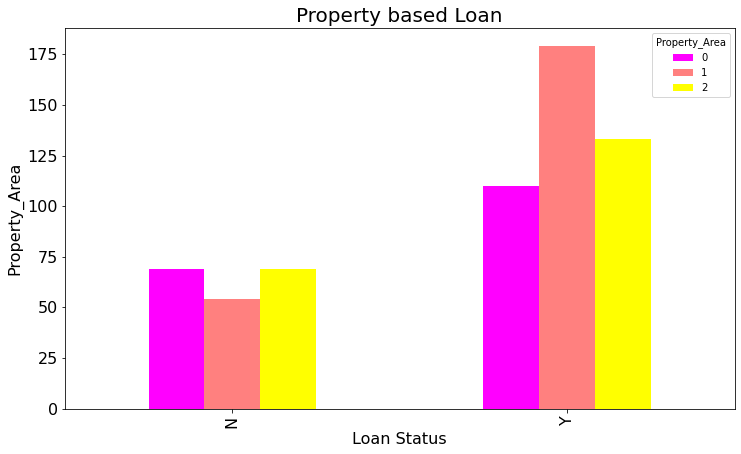

In [116]:
health_index = pd.crosstab(index=data['Loan_Status'], columns=data.Property_Area)
health_index.plot.bar(colormap='spring',fontsize=16, figsize=(12,7))
plt.title('Property based Loan', fontsize=20)
plt.ylabel('Property_Area', fontsize=16)
plt.xlabel('Loan Status', fontsize=16)
plt.show()

**COUNT PLOT**

We can observe that most of the applicants are not self employed

Text(0.5, 1.0, 'Self Employed\n')

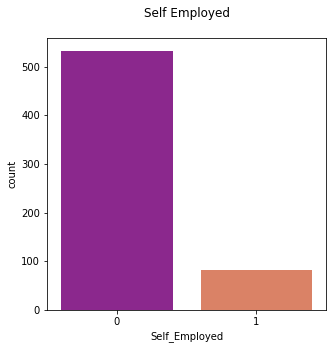

In [117]:
plt.figure(figsize=(5,5))
sns.countplot(x='Self_Employed',data=data,palette='plasma')# self employed & not self employed student representaion on countplot
plt.title('Self Employed\n')

**VIOLIN PLOT**

We can observe that both are identical and also male are applying for more loan than than female

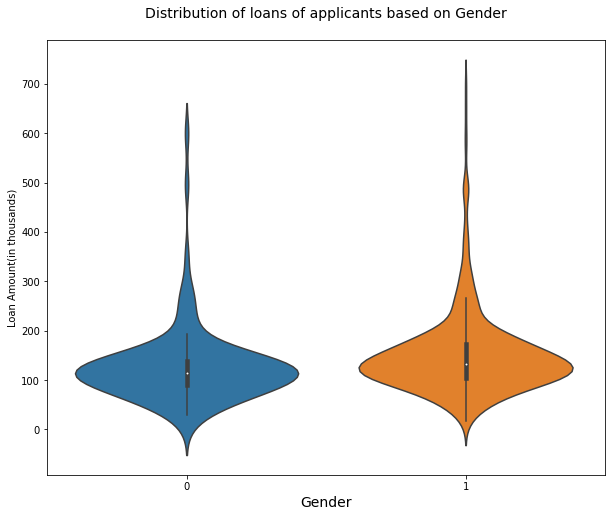

In [118]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="Gender",y="LoanAmount",data=data)
ax.set_ylabel('Loan Amount(in thousands)');
ax.set_xlabel('Gender', fontsize=14);
#Male - 1 Female - 0
ax.grid(False)
ax.set_title('Distribution of loans of applicants based on Gender\n', fontsize=14);

In [119]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,labelTerm
0,LP001002,1,0,0,1,0,2,Y,146.412162,360.0,1,5849.0,3
1,LP001003,1,1,1,1,0,0,N,128.000000,360.0,1,6091.0,3
2,LP001005,1,1,0,1,1,2,Y,66.000000,360.0,1,3000.0,3
3,LP001006,1,1,0,0,0,2,Y,120.000000,360.0,1,4941.0,3
4,LP001008,1,0,0,1,0,2,Y,141.000000,360.0,1,6000.0,3


**SWRAM PLOT**

We can observe that most of the people have opted for Long_Amount_term and also the bank has approved loans mostly for the long term payers

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Loan_Amount_Term(months)')

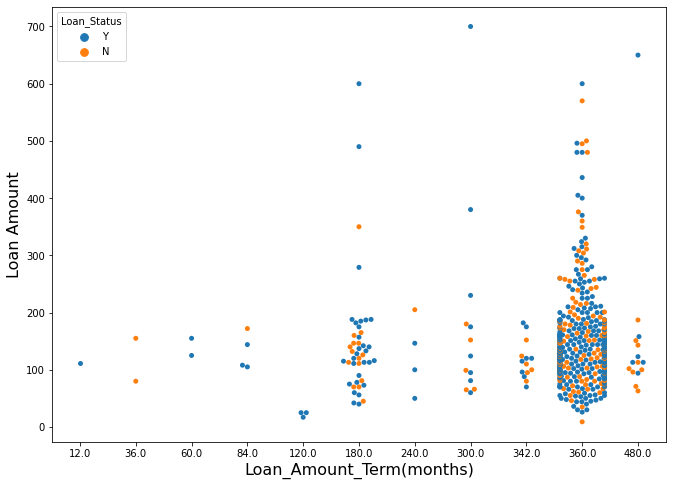

In [120]:
plt.figure(figsize=(11,8))
sns.swarmplot(x = data.Loan_Amount_Term, y = data.LoanAmount,hue = data.Loan_Status)
plt.ylabel('Loan Amount', fontsize=16)
plt.xlabel('Loan_Amount_Term(months)', fontsize=16)

We can observe that the Loan amount attribute is Positively Skewed and most of the Loan Amount granted is between  1lakh and 2 lakh

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


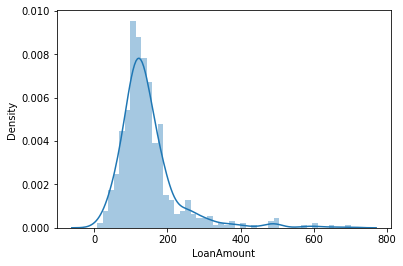

In [121]:
sns.distplot(data['LoanAmount']);

**CORRELATION ANALYSIS**

The highly negative correlated values are represented by dark red colour    

The highly positive correlated values are represented by dark green colour  

The lighter shades of red and green represent less correlation or no correlation between features                      
                  
Since the diagonal cells are self mapped to each other so they are highly positively correlated

Observation:-
We can observe that Loan Amount and Total Income are highly correleated

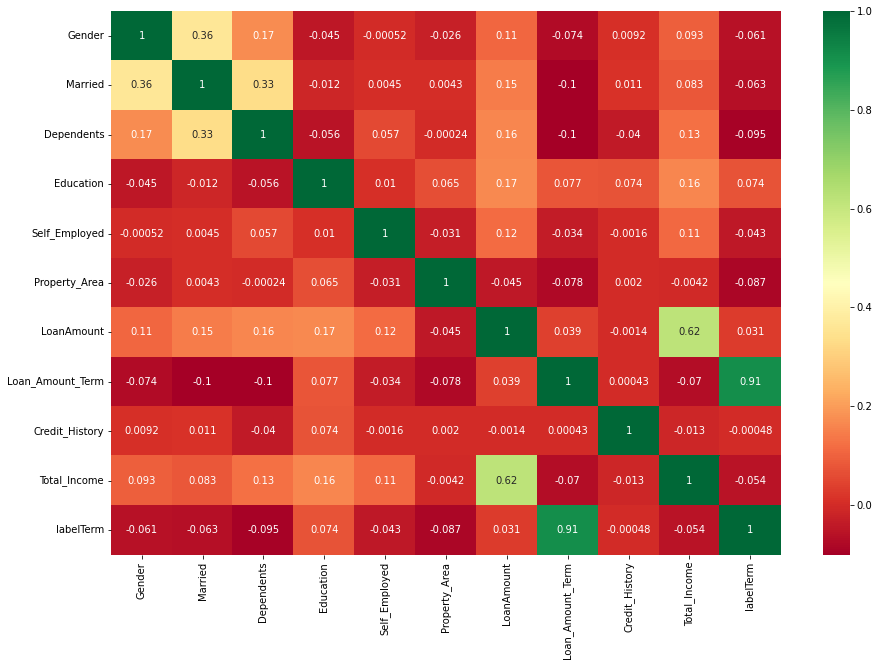

In [122]:
plt.figure(figsize=(15,10))
g = sns.heatmap(data=data.corr(),annot=True,cmap="RdYlGn")

In [123]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,labelTerm
0,LP001002,1,0,0,1,0,2,Y,146.412162,360.0,1,5849.0,3
1,LP001003,1,1,1,1,0,0,N,128.000000,360.0,1,6091.0,3
2,LP001005,1,1,0,1,1,2,Y,66.000000,360.0,1,3000.0,3
3,LP001006,1,1,0,0,0,2,Y,120.000000,360.0,1,4941.0,3
4,LP001008,1,0,0,1,0,2,Y,141.000000,360.0,1,6000.0,3


In [124]:
data = data.drop('Loan_Amount_Term',axis=1)

#**EDA - EXPLORATORY DATA ANALYSIS**

**BOX PLOT**

We can observe that applicants who are not self employed are given more loan amount compared to that of self employed

Text(0.5, 1.0, 'Self Employed vs Loan Amount')

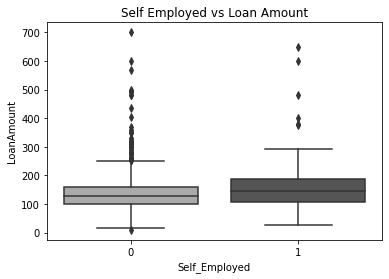

In [125]:
b = sns.boxplot(x=data['Self_Employed'],y=data['LoanAmount'],palette='binary')
b.axes.set_title('Self Employed vs Loan Amount')

**REGRESSION PLOT**

Regression plot creates a regression line between 2 parameters and helps to visualize their linear relationships

 **Observation**
 
 We can observe that Loan Amount and Total Income are positively releated 

Text(0.5, 1.0, 'Loan Amount vs Total Income')

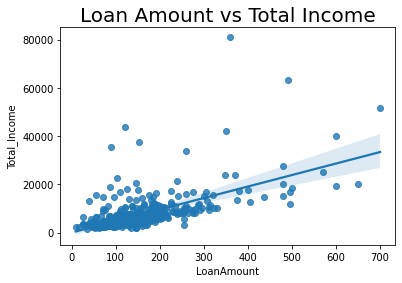

In [126]:
sns.regplot(x='LoanAmount', y='Total_Income', data=data)
plt.title('Loan Amount vs Total Income', fontsize=20)

**PIE CHART**

A pie chart is a type of data visualization that is used to illustrate numerical proportions in data. Pie charts typically show relative proportions of different categories in a data set.

**OBSERVATION**

We can observe that most of the loan applications are coming with rural property areas

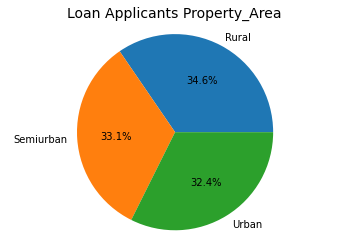

In [127]:
g = data.groupby(['Property_Area']).LoanAmount.mean()
my_labels = 'Rural','Semiurban','Urban'
plt.pie(g,labels=my_labels,autopct='%1.1f%%')
plt.title('Loan Applicants Property_Area',fontsize=14) 
plt.axis('equal')
plt.show()

**BOXPLOT**

To display 5 point summary and identify if there are any outliers

**OBSERVATION**

We can observe that there are outliers in below attributes

Text(0.5, 1.0, 'Loan')

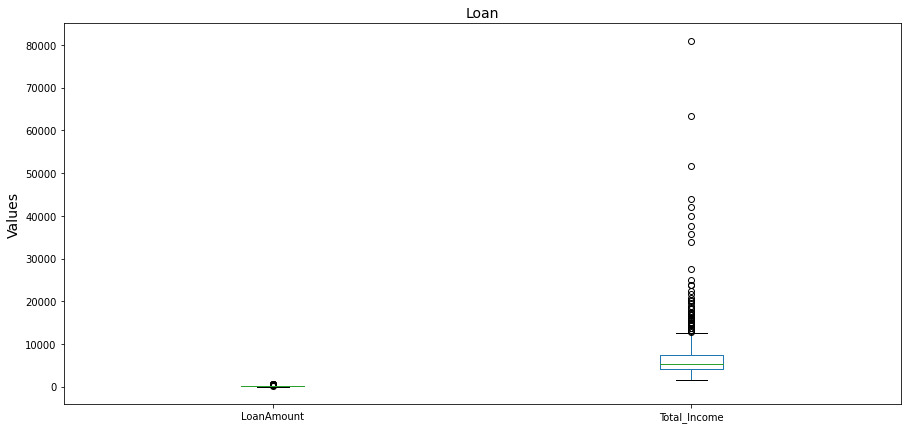

In [128]:
plt.figure(figsize=(15,7))
ax = data.boxplot(column=['LoanAmount','Total_Income'])
ax.set_ylabel('Values', fontsize=14)
ax.grid(False)
ax.set_title('Loan', fontsize=14)

**FIVE POINT SUMMARY(MIN,MAX,MEDIAN(Q2),Q1,Q3)**

**OUTLIERS**


In [129]:
def outliers(data,i):
  q1=data[i].quantile(0.25)#Finding first quartile - 25%
  q2=data[i].quantile(0.50)#Finding first quartile - 50%
  q3=data[i].quantile(0.75)#Finding first quartile - 75%
  data_min, data_max = min(data[i]), max(data[i])
  print(i)
  print('Min: %.3f' % data_min)
  print('Q1: %.3f' % q1)
  print('Median: %.3f' % q2)
  print('Q3: %.3f' % q3)
  print('Max: %.3f' % data_max)
  IQR = q3-q1
  lower_boundary = q1 - 1.5 * IQR
  Upper_boundary = q3 + 1.5 * IQR
  print(lower_boundary)
  print(Upper_boundary)
  ls = data.index[(data[i]<lower_boundary)|(data[i]>Upper_boundary)]#Finding and storing the outliers of the numeric features in a list
  p = len(ls)
  print(p)
  print(ls)
  print("\n")
  return ls

Below is the 5 number summary and count for number of outliers in the attribute

In [130]:
lst1=[] #used to store all the ouliers
for i in ['LoanAmount','Total_Income']:
  lst1.extend(outliers(data,i)) 

LoanAmount
Min: 9.000
Q1: 100.250
Median: 129.000
Q3: 164.750
Max: 700.000
3.5
261.5
41
Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')


Total_Income
Min: 1442.000
Q1: 4166.000
Median: 5416.500
Q3: 7521.750
Max: 81000.000
-867.625
12555.375
50
Int64Index([  9,  34, 102, 115, 126, 128, 130, 138, 146, 155, 171, 177, 180,
            183, 185, 254, 258, 278, 284, 308, 324, 325, 333, 351, 369, 370,
            372, 376, 402, 409, 417, 424, 432, 443, 444, 467, 475, 478, 487,
            493, 506, 509, 523, 525, 534, 561, 572, 581, 594, 600],
           dtype='int64')




**Remove Outliers**

In [131]:
data.shape

(614, 12)

In [132]:
data.isnull().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Property_Area     0
Loan_Status       0
LoanAmount        0
Credit_History    0
Total_Income      0
labelTerm         0
dtype: int64

In [133]:
def remove(data,l):
  l=sorted(set(l))
  data = data.drop(index=l)#Removing all the outliers present.
  return data

data=remove(data,lst1)#Updating dataset

Text(0.5, 1.0, 'Loan')

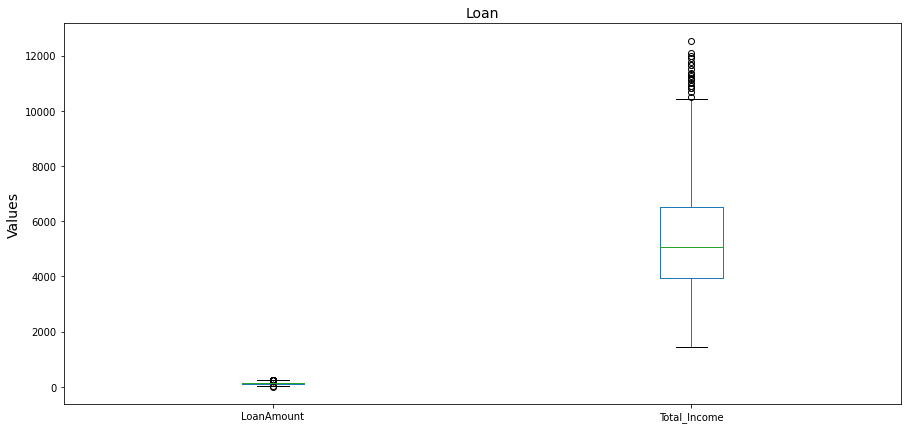

In [134]:
plt.figure(figsize=(15,7))
ax = data.boxplot(column=['LoanAmount','Total_Income'])
ax.set_ylabel('Values', fontsize=14)
ax.grid(False)
ax.set_title('Loan', fontsize=14)

We can observe that whiskers were at different position than before and also the q1,q2,q3 values have chnaged 

In [135]:
data.shape

(548, 12)

There is a change in number of the rows before and after . We removed outliers because they can affect the prediction. Since our data is skewed we cannot remove all of the outliers

In [136]:
data.drop(labels=['Loan_ID'],axis=1,inplace=True)

In [137]:
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [138]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Credit_History,Total_Income,labelTerm
0,1,0,0,1,0,2,1,146.412162,1,5849.0,3
1,1,1,1,1,0,0,0,128.000000,1,6091.0,3
2,1,1,0,1,1,2,1,66.000000,1,3000.0,3
3,1,1,0,0,0,2,1,120.000000,1,4941.0,3
4,1,0,0,1,0,2,1,141.000000,1,6000.0,3


In [139]:
data.dtypes

Gender              int64
Married             int64
Dependents          int64
Education           int64
Self_Employed       int64
Property_Area       int64
Loan_Status         int64
LoanAmount        float64
Credit_History      int64
Total_Income      float64
labelTerm           int64
dtype: object

In [140]:
X = data.drop(labels=['Loan_Status'],axis=1)
y = data['Loan_Status']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#MODELS

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
rd_clf = RandomForestClassifier(criterion = 'entropy')
rd_clf.fit(X_train, y_train)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.8011049723756906 

Confusion Matrix :- 
[[ 26  31]
 [  5 119]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.46      0.59        57
           1       0.79      0.96      0.87       124

    accuracy                           0.80       181
   macro avg       0.82      0.71      0.73       181
weighted avg       0.81      0.80      0.78       181



In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7329700272479565
Test Accuracy of KNN is 0.6353591160220995 

Confusion Matrix :- 
[[  4  53]
 [ 13 111]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.24      0.07      0.11        57
           1       0.68      0.90      0.77       124

    accuracy                           0.64       181
   macro avg       0.46      0.48      0.44       181
weighted avg       0.54      0.64      0.56       181



In [151]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

svc_acc = accuracy_score(y_test, svc.predict(X_test))

print(f"Training Accuracy of SVC is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Test Accuracy of SVC is {svc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svc.predict(X_test))}")

Training Accuracy of SVC is 0.8092643051771117
Test Accuracy of SVC is 0.8066298342541437 

Confusion Matrix :- 
[[ 23  34]
 [  1 123]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.40      0.57        57
           1       0.78      0.99      0.88       124

    accuracy                           0.81       181
   macro avg       0.87      0.70      0.72       181
weighted avg       0.84      0.81      0.78       181



In [144]:
from sklearn.linear_model import LogisticRegression
clf_lr1 = LogisticRegression(class_weight="balanced", random_state=42)

clf_lr1.fit(X_train,y_train)
clf_lr1_acc = accuracy_score(y_test, clf_lr1.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, clf_lr1.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {clf_lr1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, clf_lr1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, clf_lr1.predict(X_test))}")



Training Accuracy of Random Forest Classifier is 0.8038147138964578
Test Accuracy of Random Forest Classifier is 0.7955801104972375 

Confusion Matrix :- 
[[ 27  30]
 [  7 117]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.47      0.59        57
           1       0.80      0.94      0.86       124

    accuracy                           0.80       181
   macro avg       0.80      0.71      0.73       181
weighted avg       0.80      0.80      0.78       181



In [154]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Random Forest Classifier','LogisticRegression', 'SVC'],'Test Score' : [knn_acc,  rd_clf_acc,clf_lr1_acc,svc_acc]
})


models.sort_values(by = 'Test Score', ascending = False)

,Model,Test Score
3,SVC,0.806630
1,Random Forest Classifier,0.801105
2,LogisticRegression,0.795580
0,KNN,0.635359
